In [1]:
import glob

luna_datasets = glob.glob('../../luna16/LUNA16/subset*/*.mhd')
print("Số lượng bộ quét CT:", len(luna_datasets))

# số lượng bộ quét CT 888 bộ

Số lượng bộ quét CT: 888


### Số lượng ảnh CT và kích thước ảnh CT

In [2]:
#
import SimpleITK as sitk
from tqdm import tqdm
import numpy as np

shapes = []
for f in tqdm(luna_datasets):
  ct_mhd = sitk.ReadImage(f)
  ct_a = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32)
  shapes.append((f, ct_mhd.GetOrigin(), ct_mhd.GetSpacing(), ct_mhd.GetDirection(), ct_a.shape))

100%|██████████| 888/888 [20:21<00:00,  1.38s/it]


In [3]:
D = set(s[4][0] for s in shapes)
W = set(s[4][1] for s in shapes)
H = set(s[4][2] for s in shapes)

print(f"Khoảng slide trong luna16: {min(D)} - {max(D)}")
print(f"Chiều rộng: {W}")
print(f"Chiều cao: {H}")

# số lượng slide [95-774]
# chiều dài và chiều rộng 512

Khoảng slide trong luna16: 95 - 764
Chiều rộng: {512}
Chiều cao: {512}


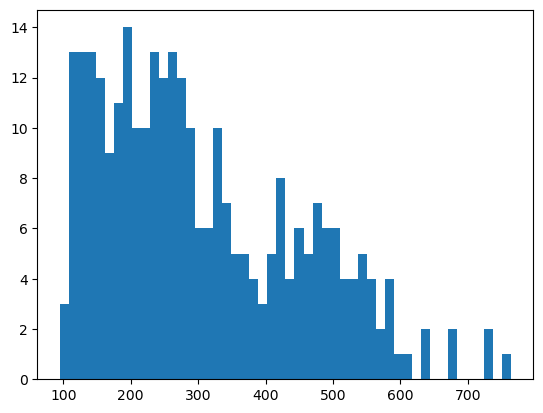

In [4]:
import matplotlib.pyplot as plt

plt.hist(D, bins=50)
plt.show()
# Phân phối số lượng slide trên bộ CT của bệnh nhân.

In [5]:
shapes[0]

('../../luna16/LUNA16\\subset0\\1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd',
 (-198.100006, -195.0, -335.209991),
 (0.7617189884185791, 0.7617189884185791, 2.5),
 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 (121, 512, 512))

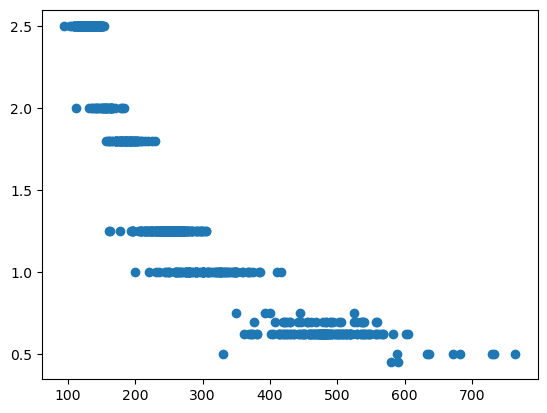

In [6]:
num_slide = [s[4][0] for s in shapes]
distance_slide = [s[2][2] for s in shapes]

plt.scatter(num_slide, distance_slide)

In [7]:
x = set(s[2][0] for s in shapes)
y = set(s[2][1] for s in shapes)
z = set(s[2][2] for s in shapes)

print(f"Spcaing x: {min(x)} - {max(x)}")
print(f"Spcaing y: {min(y)} - {max(y)}")
print(f"Spcaing z: {min(z)} - {max(z)}")

# Spcaing x: 0.4609375 - 0.9765620231628418
# Spcaing y: 0.4609375 - 0.9765620231628418
# Spcaing z: 0.45000001788139343 - 2.500000238418579

Spcaing x: 0.4609375 - 0.9765620231628418
Spcaing y: 0.4609375 - 0.9765620231628418
Spcaing z: 0.45000001788139343 - 2.500000238418579


In [8]:
# láy các uids trong trong tập dữ liệu
local_files = glob.glob('../luna16/LUNA16/subset*/*.mhd')
local_uids = [f.split('/')[-1][:-4] for f in local_files]

## Bản đơn vị HU
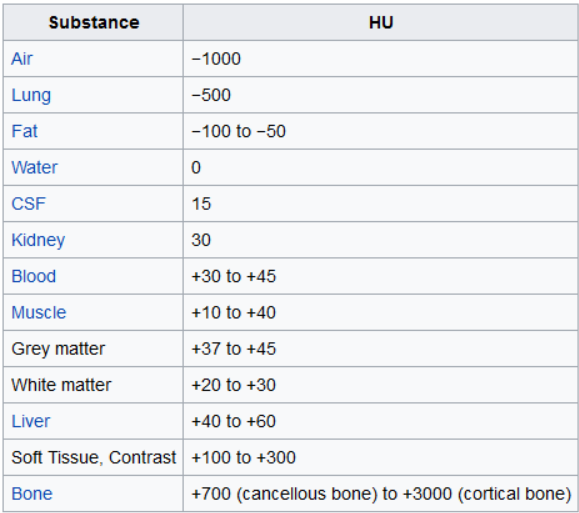

## Annotations và candidates

In [9]:
import pandas as pd

annotations = pd.read_csv("../../luna16/annotations.csv")
candidates = pd.read_csv("../../luna16/candidates.csv")

print("Số lượng khối u:", len(annotations))
print("Số lượng ứng viên:", len(candidates))

# số lượng khối u 1186
# số lượng ứng viên 551065

Số lượng khối u: 1186
Số lượng ứng viên: 551065


In [10]:
# show head annotations
annotations.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [11]:
# show head candidates
candidates.head()

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


In [12]:
# số lượng class 1
print("Số lượng class 1:", len(candidates[candidates['class'] == 1]))

Số lượng class 1: 1351


In [13]:
unique_annotations = np.unique(annotations['seriesuid'])
unique_candidates = np.unique(candidates['seriesuid'])

print("Số lượng uids trên tập annotations:",len(unique_annotations))
print("Số lượng uids trên tập candidates:", len(unique_candidates))

# có 601 uids trên annotations
# có 888 uids trên tập candidates

Số lượng uids trên tập annotations: 601
Số lượng uids trên tập candidates: 888


In [14]:
# Khiểm tra xem có uid nào annotations không có trong tập dữ liệu
for id in unique_annotations:
  if id not in local_uids:
    print(id)

# tất cả uids trong annoations đều có trong tập dữ liệu

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275
1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249
1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217
1.3.6.1.4.1.14519.5.2.1.6279.6001.105495028985881418176186711228
1.3.6.1.4.1.14519.5.2.1.6279.6001.106164978370116976238911317774
1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949
1.3.6.1.4.1.14519.5.2.1.6279.6001.106630482085576298661469304872
1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375
1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943
1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306
1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492
1.3.6.1.4.1.14519.5.2.1.6279.6001.108231420525711026834210228428
1.3.6.1.4.1.14519.5.2.1.6

In [15]:
# Khiểm tra xem có uid nào candidates không có trong tập dữ liệu
for id in unique_candidates:
  if id not in local_uids:
    print(id)
# tất cả uids trong candidate đều có trong tập dữ liệu

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926682752765845212286
1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482151095585000946543
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275
1.3.6.1.4.1.14519.5.2.1.6279.6001.101228986346984399347858840086
1.3.6.1.4.1.14519.5.2.1.6279.6001.102133688497886810253331438797
1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249
1.3.6.1.4.1.14519.5.2.1.6279.6001.103115201714075993579787468219
1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217
1.3.6.1.4.1.14519.5.2.1.6279.6001.104780906131535625872840889059
1.3.6.1.4.1.14519.5.2.1.6279.6001.105495028985881418176186711228
1.3.6.1.4.1.14519.5.2.1.6

## Ghép hai file annotations và candidates

In [16]:
annotations_np = annotations.to_numpy()
# candidates_np = candidates.to_numpy()
mer2file = []

for f in tqdm(annotations_np):
  uid_f = candidates[candidates['seriesuid'] == f[0]]
  candidates_np = uid_f.to_numpy()
  for i in candidates_np:
    for k in range(1, 4):
      delta_mm = abs(f[k] - i[k])
      if delta_mm > f[4]/4:
        break
    else:
      mer2file.append((f, i))

100%|██████████| 1186/1186 [00:52<00:00, 22.45it/s]


In [17]:
print("Số lượng kết hợp giữa hai tập:", len(mer2file))
# 1028 node tìm thấy và toàn class 1

Số lượng kết hợp giữa hai tập: 1028


In [18]:
mer2file[0]
classes = []

for i in mer2file:
  classes.append(i[0][4])

In [19]:
classes.sort()

print("Bán kính khối U lớn nhất:", classes[-1])
print("Bán kính khối U nhỏ nhất:", classes[0])
# khối u có bán kính lớn nhất 32.27
# khối u có bán kính bé nhất 3.25

Bán kính khối U lớn nhất: 32.27003025
Bán kính khối U nhỏ nhất: 3.253443196


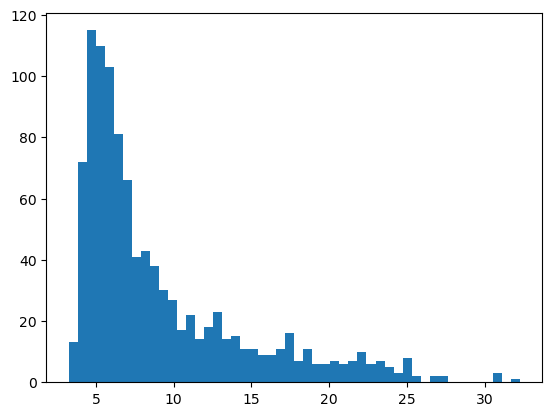

In [20]:
# Phôi phối kích thước bán kính của khối u.

plt.hist(classes, bins=50)
plt.show()

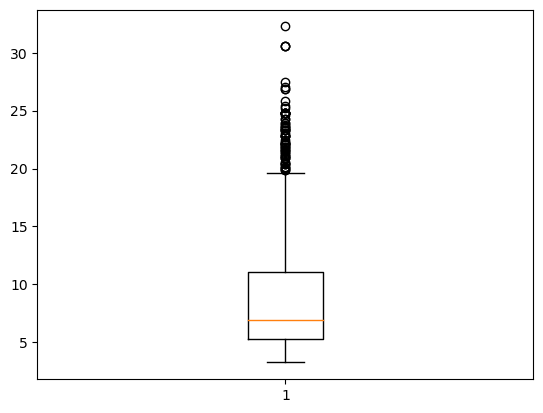

In [22]:
plt.boxplot(classes)
plt.set_title("Biểu đồ ")
plt.show()